In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense, LSTM

%matplotlib inline

Using TensorFlow backend.


https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv

In [2]:
# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')


dataset = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)

In [3]:
dataset

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,0.0,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,0.0,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,0.0,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,0.0,-19,-9.0,1017.0,NW,24.15,0,0


In [3]:
# 最初の24時間がNaなのでdropする。
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('pollution.csv')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


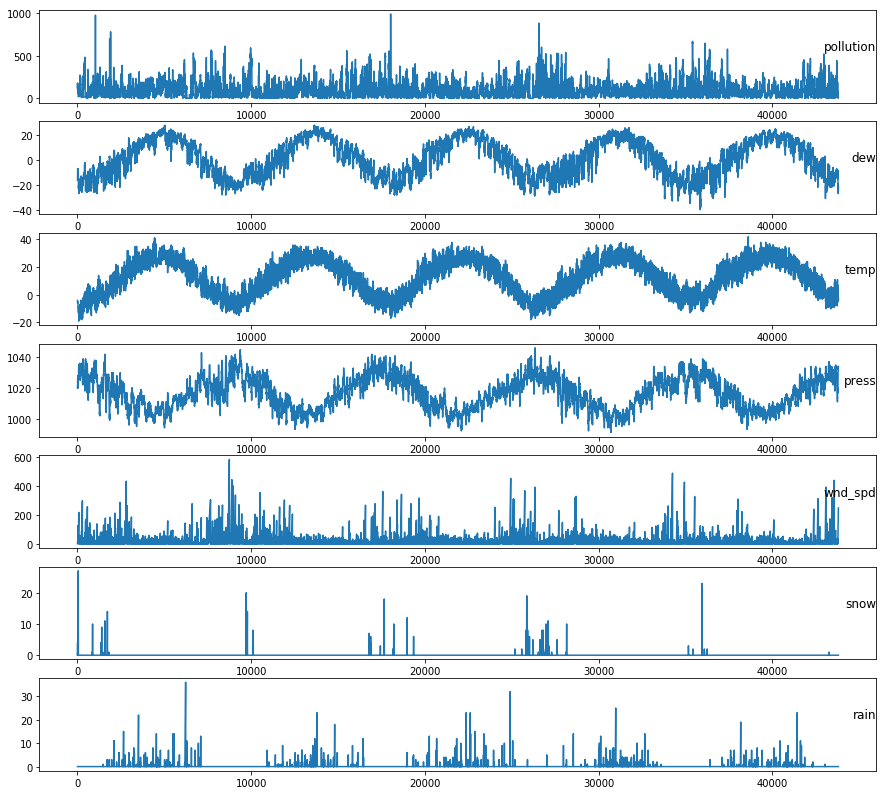

In [4]:
# load dataset
dataset = pd.read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize=(15,14))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [5]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = pd.read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = preprocessing.LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658  


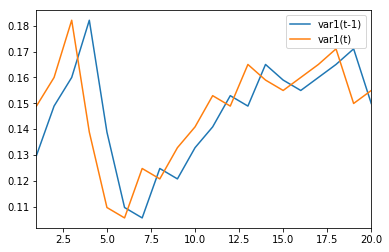

In [6]:
reframed[['var1(t-1)', 'var1(t)']][:20].plot()

In [7]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# CPUでは問題なかったが、GPU(GTX1080ti)だとlossがNanになってしまったため、桁を変える。
train_X = train_X.astype(np.float64)
train_y = train_y.astype(np.float64)
test_X = test_X.astype(np.float64)
test_y = test_y.astype(np.float64)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


In [15]:
from keras import optimizers

# All parameter gradients will be clipped to
# a maximum norm of 1.
sgd = optimizers.SGD(lr=0.01, clipnorm=1., clipvalue=0.3)

In [17]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer=sgd)
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 8760 samples, validate on 35039 samples
Epoch 1/50
0s - loss: nan - val_loss: nan
Epoch 2/50
0s - loss: nan - val_loss: nan
Epoch 3/50
0s - loss: nan - val_loss: nan
Epoch 4/50
0s - loss: nan - val_loss: nan
Epoch 5/50
0s - loss: nan - val_loss: nan
Epoch 6/50


KeyboardInterrupt: 

In [20]:
import tensorflow as tf
with tf.device('/cpu:0'):
    # design network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer=sgd)
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 8760 samples, validate on 35039 samples
Epoch 1/50
0s - loss: nan - val_loss: nan
Epoch 2/50
0s - loss: nan - val_loss: nan
Epoch 3/50
0s - loss: nan - val_loss: nan
Epoch 4/50
0s - loss: nan - val_loss: nan
Epoch 5/50
0s - loss: nan - val_loss: nan
Epoch 6/50
0s - loss: nan - val_loss: nan
Epoch 7/50
0s - loss: nan - val_loss: nan
Epoch 8/50
0s - loss: nan - val_loss: nan
Epoch 9/50
0s - loss: nan - val_loss: nan
Epoch 10/50
0s - loss: nan - val_loss: nan
Epoch 11/50
0s - loss: nan - val_loss: nan
Epoch 12/50
0s - loss: nan - val_loss: nan
Epoch 13/50
0s - loss: nan - val_loss: nan
Epoch 14/50
0s - loss: nan - val_loss: nan
Epoch 15/50
0s - loss: nan - val_loss: nan
Epoch 16/50
0s - loss: nan - val_loss: nan
Epoch 17/50
0s - loss: nan - val_loss: nan
Epoch 18/50


KeyboardInterrupt: 

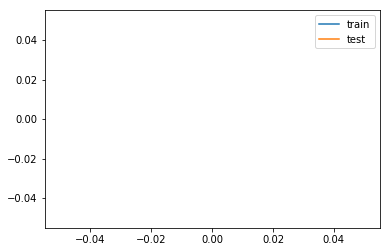

In [31]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)